# 4.1 선형회귀

모델을 훈련시킨다는 것은 모델이 훈련 세트에 맞도록 모델 파라미터를 설정하는 것

성능 측정 지표로 RMSE를 많이 사용함  
RMSE를 최소화하는 $\theta$를 찾아야 함

## 4.1.1 정규방정식

비용 함수를 최소화하는 $\theta$를 찾기 위한 해석적인 방법  
$\hat\theta=(X^TX)^{-1}X^Ty$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

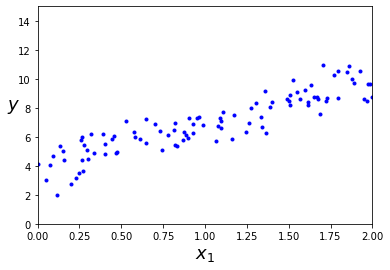

In [27]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [17]:
theta_best

array([[3.88606392],
       [3.0020564 ]])

In [20]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[3.88606392],
       [9.89017672]])

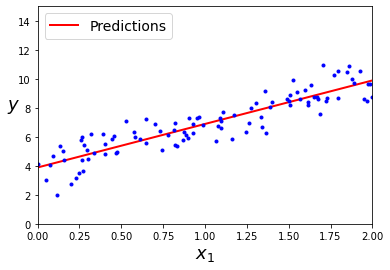

In [29]:
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88606392]), array([[3.0020564]]))

In [33]:
lin_reg.predict(x_new)

array([[3.88606392],
       [9.89017672]])

LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있음

In [36]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.88606392],
       [3.0020564 ]])

이 함수는 $X^+y$을 계산  
$X^+$는 $X$의 유사역행렬 (pseudoinverse)(Moore–Penrose 유사역행렬)  
`np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산

In [37]:
np.linalg.pinv(x_b).dot(y)

array([[3.88606392],
       [3.0020564 ]])

# 4.3 다항 회귀

비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음  
각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시는 것

- 2차방정식으로 비선형 데이터를 생성  
PolynomialFeatures를 사용해 훈련 데이터를 변환 

In [2]:
import numpy as np

In [4]:
m=20
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly.fit_transform(x)

In [10]:
x[0]

array([-2.31119391])

In [11]:
x_poly[0]

array([-2.31119391,  5.34161728])

In [12]:

lin_reg=LinearRegression()

NameError: name 'LinearRegression' is not defined